In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data loading and Data cleaning
- Removing columns having no data
- Cleaning Emp length by extracting only numbers

In [15]:
initialDf=pd.read_csv('C:/Users/gaura/Gaurav_Tyagi/Drive Study/Z-Python-Ml-AI/Jupyter-Notebook/z_My_ML_AI_Course/Lending_CaseClubStudy/loan/loan.csv')
print('orginal dataframe size',initialDf.shape)
# will return dataframe having null values represented as true and any will return name of columns 
df=initialDf.isna()

# Calculating Na values percentage for each column
columns=round(df.sum()/df.shape[0],2)
cleanedColumnDf=columns.reset_index().rename(columns={0:'novaluepercentage'})

# Identifying Columns with the less than 5 percent of Na values
cleanedColumnDf=cleanedColumnDf[(cleanedColumnDf['novaluepercentage']>=0) & (cleanedColumnDf['novaluepercentage']<.05)]

cleanedColumnLst=cleanedColumnDf['index'].to_list()

relevantColumns=initialDf[cleanedColumnLst]
relevantColumns=relevantColumns.dropna()

# Creating new column to have monthly income
relevantColumns['monthly_income']=round(relevantColumns['annual_inc']/12,2)

# Extracting numbers from emp length column by removing text and extracting only numbers
relevantColumns['emp_length_years']=relevantColumns['emp_length'].str.extract(r'(\d+)')
print('dataframe size after cleaning ',relevantColumns.shape)


C:\Users\gaura\AppData\Local\Temp\ipykernel_4664\808006333.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  initialDf=pd.read_csv('C:/Users/gaura/Gaurav_Tyagi/Drive Study/Z-Python-Ml-AI/Jupyter-Notebook/z_My_ML_AI_Course/Lending_CaseClubStudy/loan/loan.csv')


orginal dataframe size (39717, 111)
dataframe size after cleaning  (37823, 54)


# Part 1

## Below Univariate analysis of total loan distribution to identify what percentage of loan is bad loan
- Charged Off loans are 13.8 percent of total loan

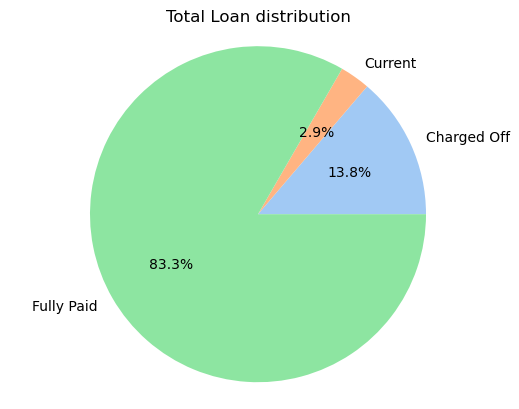

In [47]:
employementIncomeLoanStatus=relevantColumns[['id','loan_amnt','loan_status']]

# Doing group by over loan status and counting total loan amount per category. 
# finally reseting index to have loam amount and loan status as columns
pieDataDf=employementIncomeLoanStatus.groupby('loan_status')['loan_amnt'].count().reset_index()

plt.pie(pieDataDf['loan_amnt'],labels=pieDataDf['loan_status'],autopct='%1.1f%%')
plt.title('Total Loan distribution')
plt.axis('equal')
plt.show()

## Bivariate analysis of Charged off loan status and employment experience.
- It is obsereved that highest amount default is done by people having experience 10 years. It is evident that people <br> with high experience has large loan liability
- Pie chart also revels that people with experience from 1 to 5 years and 10 years do most of default
- Both 1 year and 10 year of experience people have high debt to income ratio making them at high risk loans

C:\Users\gaura\AppData\Local\Temp\ipykernel_4664\3102538579.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pieCharDtiDf=pieCharGroupBy.sum().reset_index()


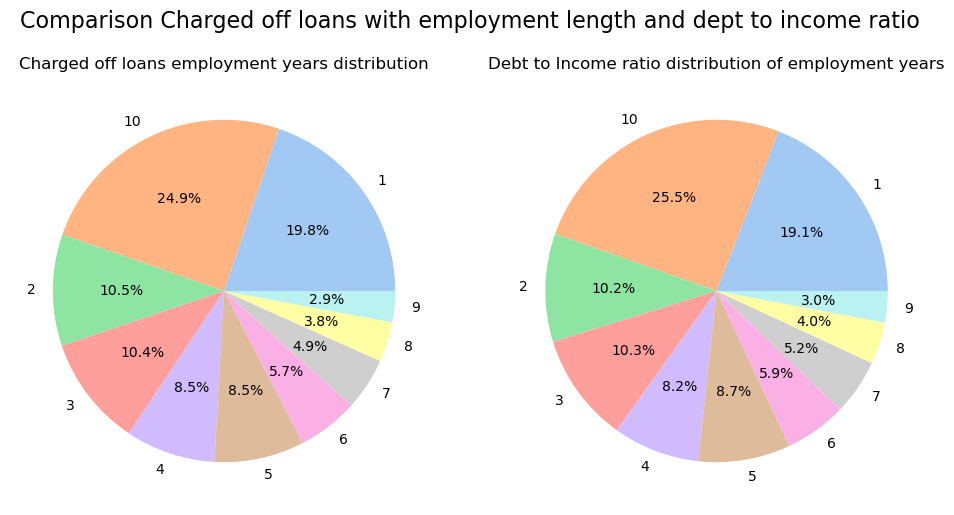

In [54]:
empLengthAnalysis=relevantColumns[['id','emp_length','loan_status','emp_length_years','dti']]

# Extracting all chargedoff loans
empLengthAnalysis=empLengthAnalysis[empLengthAnalysis.loan_status=='Charged Off']

# grouping by employment length among charged off loan
pieCharGroupBy=empLengthAnalysis.groupby('emp_length_years')

pieChar=pieCharGroupBy.count().reset_index()

pieCharDtiDf=pieCharGroupBy.sum().reset_index()

# Creating a figure with two subplots (1 row, 2 columns)
fig, axies = plt.subplots(1, 2, figsize=(10, 5))

# First pie chart
axies[0].pie(pieChar['id'],labels=pieChar['emp_length_years'], autopct='%1.1f%%')
axies[0].set_title('Charged off loans employment years distribution')

# Second pie chart
axies[1].pie(pieCharDtiDf['dti'], labels=pieCharDtiDf['emp_length_years'], autopct='%1.1f%%')
axies[1].set_title('Debt to Income ratio distribution of employment years')

fig.suptitle('Comparison Charged off loans with employment length and dept to income ratio', fontsize=16, y=1.02)

# Equal aspect ratio ensures that each pie chart is drawn as a circle
axies[0].axis('off')
axies[1].axis('off')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

plt.show()



## Segmented Bivariate Analysis
### Identifying loan staus with respect to __dti ratio__

    * dti ration is  borrower’s total monthly debt payments divided by the borrower’s self-reported monthly income.Idea behind this analysis is the person defaulting on loan should have low dti ratio.
    * dti ratio will be ploted loan status for different borrowers

### Observation

    - Mean Dti ratio of the charged off borrower is more than fully paid meaning that charged off borrower have more monthly debt in comparisions to their monthly income
    - Although we can see that borrower with current staus have higher monthly debt in comparision to their income. It means there are many current borrowers who can become defaulters in future
    

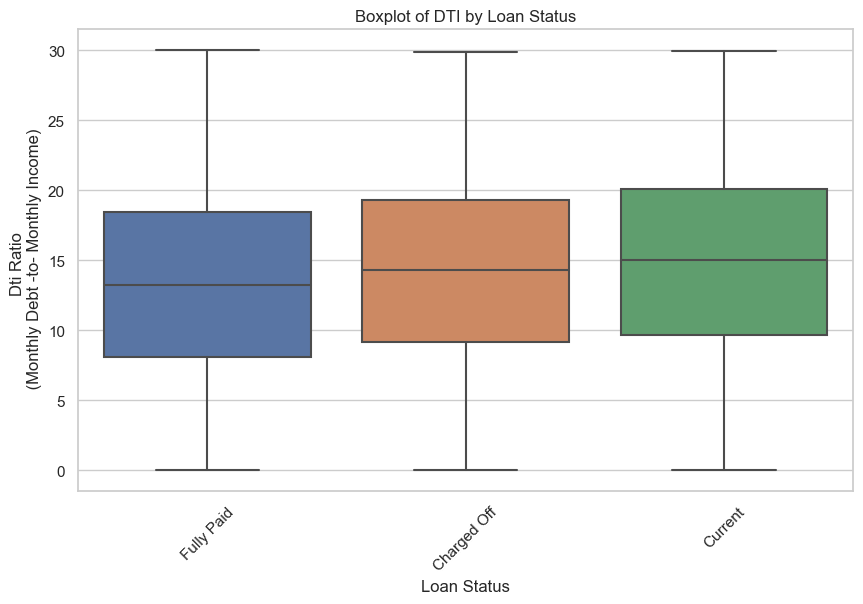

In [7]:
dtiAnalysis=relevantColumns[['loan_status','dti','monthly_income','emp_length','home_ownership']]
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  
sns.boxplot(data=dtiAnalysis, x="loan_status", y="dti")
plt.xlabel("Loan Status")
plt.ylabel("Dti Ratio \n (Monthly Debt -to- Monthly Income)")
plt.title("Boxplot of DTI by Loan Status")
plt.xticks(rotation=45)
plt.show()



## Bivariate Analysis between loan status and interest rate via box plot

-There are outlier interest rates values as well for each category but its clearly visible that defaulted loans on average are given on high interest rates

C:\Users\gaura\AppData\Local\Temp\ipykernel_27456\2367398608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interestrateAnalysis['int_rate']=interestrateAnalysis['int_rate'].str.rstrip('%').astype(float)


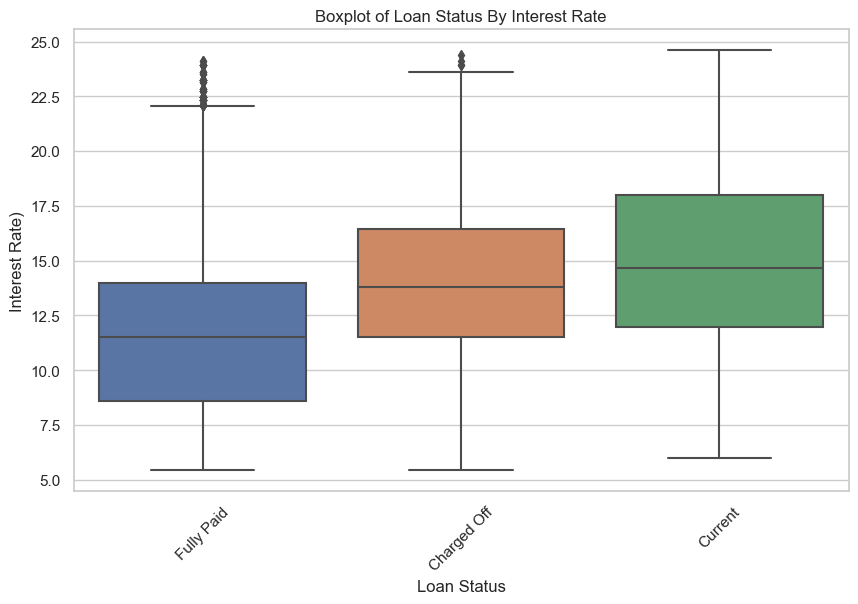

In [8]:
interestrateAnalysis=relevantColumns[['loan_status','int_rate']]

# data cleaning removing % sign from interest rate
interestrateAnalysis['int_rate']=interestrateAnalysis['int_rate'].str.rstrip('%').astype(float)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  
sns.boxplot(data=interestrateAnalysis, x="loan_status", y="int_rate")
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate)")
plt.title("Boxplot of Loan Status By Interest Rate")
plt.xticks(rotation=45)
plt.show()




## Segmented Bivariate Analysis
### Identifying loan staus with respect to __grade__

    * loan company has divided loan into multiple grades
    * we can analyse loan status against grades

### Observation

    - G grade has least number of defaulters although G grade number of loans are least
    - B grade has highest number of fully paid and largest defaulters although largest number of loan disbursed in this grade
    

<Figure size 1000x600 with 0 Axes>

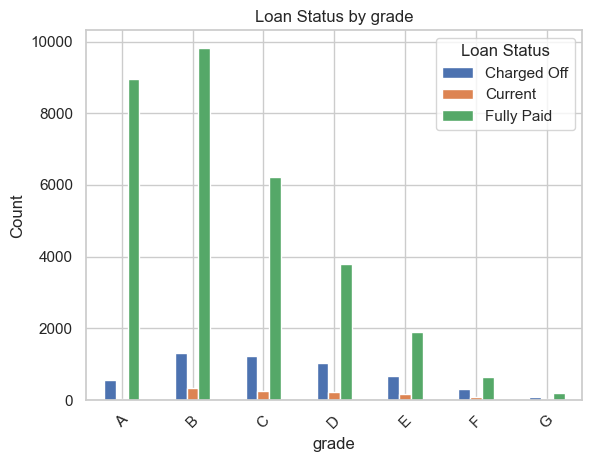

In [9]:
incomeRelatedAnalysis=relevantColumns[['int_rate','grade','loan_status','monthly_income','emp_length','verification_status','home_ownership']]

plt.figure(figsize=(10, 6))
incomeRelatedAnalysis.groupby(['grade', 'loan_status']).size().unstack().plot(kind='bar', stacked=False)
plt.title('Loan Status by grade')
plt.xlabel('grade')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.legend(title='Loan Status')
plt.show()


## Analysis by creating derived matrix income category
    - First created monthly income derived matric from annual income and then categorised income group into 4 categories
    - Identified these category by finding mean, 75%, 25% etc. Based on this categorised monthly income as low,middle, upper middle and high income groups
    - Groupby income category and loan status
    
# Observation
    - Large number of loans are disbursed to low income group and this group is the highest number of charged off loans
    - Best category to with lowest number of defaulters is high income group 

count     37823.000000
mean       5806.439136
std        5304.285010
min         333.330000
25%        3491.835000
50%        5000.000000
75%        6962.500000
max      500000.000000
Name: monthly_income, dtype: float64


C:\Users\gaura\AppData\Local\Temp\ipykernel_27456\1484291353.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomeRelatedAnalysis['income_category']= incomeRelatedAnalysis['monthly_income'].apply(findIncomeCategory)


<Figure size 1500x600 with 0 Axes>

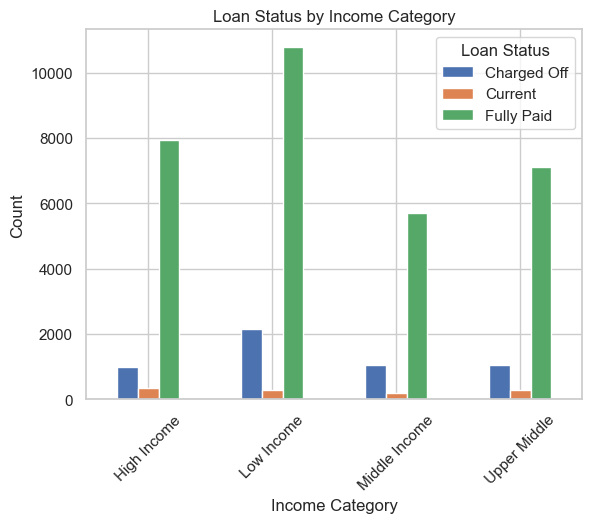

In [10]:
# This monthly income is analysised  to find mean and interqutile income to identify high, low ,and middle income
print(incomeRelatedAnalysis['monthly_income'].describe())

def findIncomeCategory(income):
    if income <=4000:
        return 'Low Income'
    elif income > 4000 and income <= 5000:
        return 'Middle Income'
    elif income > 5000 and income <=7000:
        return 'Upper Middle'
    else:
        return 'High Income'
    
incomeRelatedAnalysis['income_category']= incomeRelatedAnalysis['monthly_income'].apply(findIncomeCategory)
plt.figure(figsize=(15, 6))
incomeRelatedAnalysis.groupby(['income_category', 'loan_status']).size().unstack().plot(kind='bar', stacked=False)
plt.title('Loan Status by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()

## Bivariate analysis for highest percentage of Chargedoff loan in a purpose category of loan
    -It is observed that highest number of defaults happen in small business, while wedding and credit card loans are safe bet

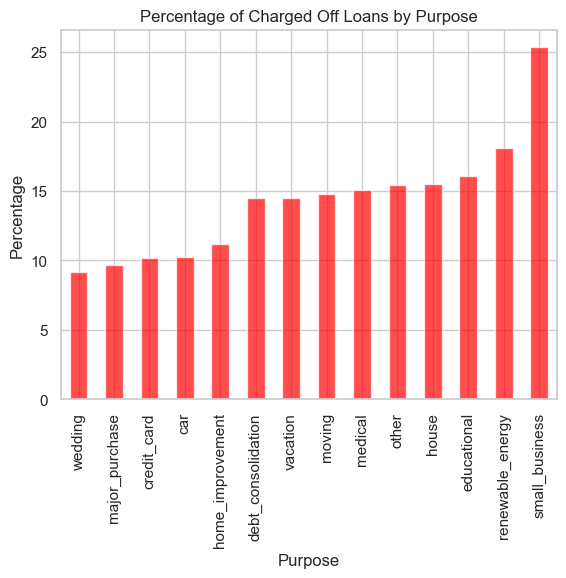

In [12]:
def findIncomeCategory(income):
    if income <=4000:
        return 'Low Income'
    elif income > 4000 and income <= 5000:
        return 'Middle Income'
    elif income > 5000 and income <=7000:
        return 'Upper Middle'
    else:
        return 'High Income'
    
relevantColumns['income_category'] = relevantColumns['monthly_income'].apply(findIncomeCategory)

purposeIncomeAnalysis=relevantColumns[['purpose','income_category','loan_status']]
grouped=purposeIncomeAnalysis.groupby(['purpose']).value_counts(normalize=True).unstack().fillna(0)

grouped = purposeIncomeAnalysis.groupby('purpose')['loan_status'].value_counts(normalize=True).unstack().fillna(0)
charged_off_percent = (grouped['Charged Off'] * 100).round(2)
charged_off_percent=charged_off_percent.sort_values()

charged_off_percent.plot(kind='bar', color='red', alpha=0.7, width=0.5,)
plt.title('Percentage of Charged Off Loans by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Percentage')
plt.show()


# Bivariate Analysis year distribution of loans and their status
- It has been onserved that charged off loans increases steeply from 2011 to 2012

C:\Users\gaura\AppData\Local\Temp\ipykernel_27456\3463625591.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loanTimining['Date'] = pd.to_datetime(loanTimining['issue_d'], format='%b-%y')


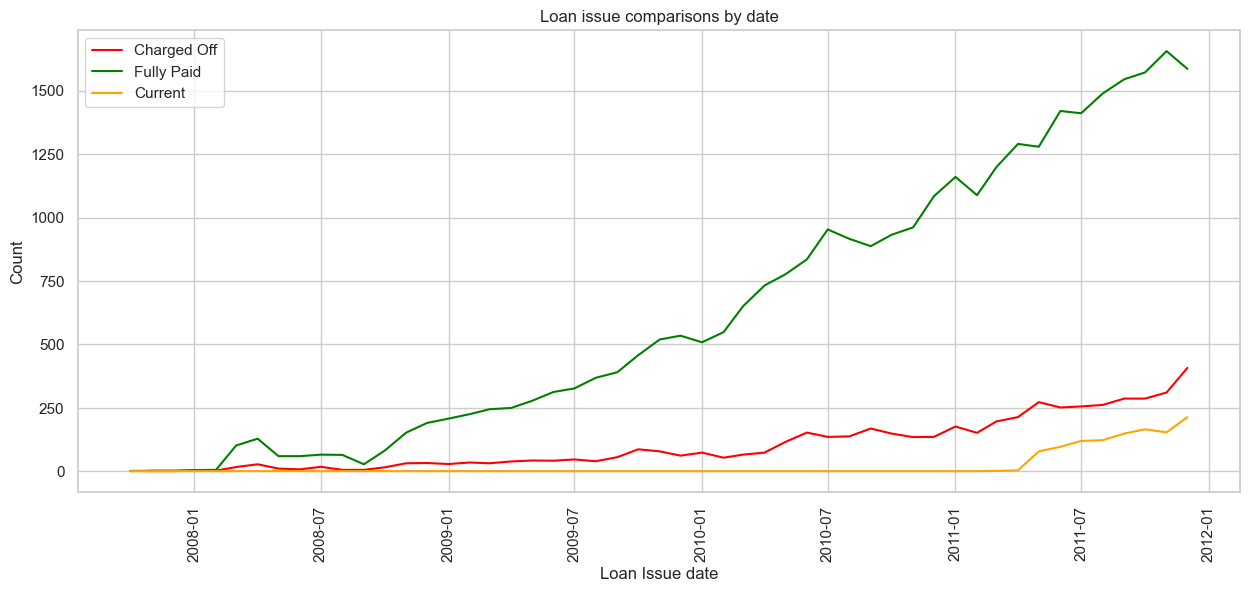

In [18]:
loanTimining=relevantColumns[['issue_d','loan_status','id']]

# current=loanTimining.groupby(['issue_d','loan_status']).count().reset_index()
# current

# Convert 'Date' to datetime format
loanTimining['Date'] = pd.to_datetime(loanTimining['issue_d'], format='%b-%y')

loanTimining=loanTimining.sort_values(by='Date')
# print(loanTimining)
# Group and count loan statuses for each date
grouped = loanTimining.groupby(['Date', 'loan_status']).size().unstack(fill_value=0)
grouped=grouped.reset_index()
plt.figure(figsize=(15, 6))
plt.plot(grouped['Date'],grouped['Charged Off'], color='red')
plt.plot(grouped['Date'],grouped['Fully Paid'], color='green')
plt.plot(grouped['Date'],grouped['Current'],color='orange')

plt.title('Loan issue comparisons by date')
plt.xlabel('Loan Issue date')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(['Charged Off','Fully Paid','Current'])
plt.show()

# chargedOff

# Univariate analysis of Loan applied, Amout Funded and Amount committed by lender
- Its has observed that eligible borrowers are likely to get amount granted as loan what they have applied since graph for loan applied , amount funded and amount commited by investor are same

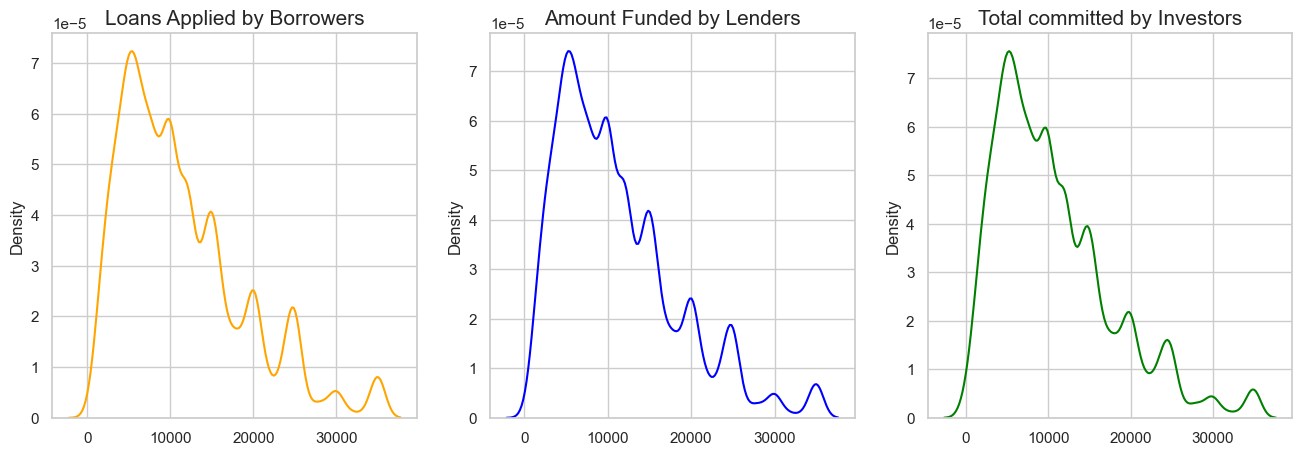

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))
loanAmount = relevantColumns["loan_amnt"].values
fundedAmount = relevantColumns["funded_amnt"].values
investorFunds = relevantColumns["funded_amnt_inv"].values

sns.kdeplot(loanAmount, ax=ax[0], color='orange')
ax[0].set_title("Loans Applied by Borrowers", fontsize=15)

sns.kdeplot(fundedAmount, ax=ax[1], color="blue")
ax[1].set_title("Amount Funded by Lenders", fontsize=15)

sns.kdeplot(investorFunds, ax=ax[2], color="green")
ax[2].set_title("Total committed by Investors", fontsize=15)

plt.show()